In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve



from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

## Métodos de evaluación 

Por ahora hemos visto que:
    
- Se necesita **separar de forma aleatoria** en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
- Existen diversas **métricas para evaluar rendimiento**, y elegimos la nuestra según las caracteristicas de nuestro problema
- Es útil **apoyar la evaluación con visualizaciones de errores**, como por ejemplo scatterplots de residuales

Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

- Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
- Podemos tener pésima performance con esa separación de datos pero no en otros.

** Controlar la aleatoridad en train_test_split**

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro *random_state*.

In [2]:
X = pd.read_csv('./data/transformed/peliculas_opening.csv')
y = X['worldwide_gross']

X.drop(columns=['movie_title', 'worldwide_gross'], inplace=True)
X.head(2)

,production_budget,budget,imdb_score,opening_gross,screens,duration,title_year,cast_total_facebook_likes,aspect_ratio
0,425000000,237000000.0,7.9,77025481.0,3452.0,178.0,2009.0,4834,1.78
1,300000000,300000000.0,7.1,139802190.0,4362.0,169.0,2007.0,48350,2.35


In [3]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

pd.DataFrame.equals(X_train, X2_train)

True

**Cross Validation**

<img src="./img/crossval.png">

In [4]:
scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

array([0.5833289 , 0.68585616, 0.55645144, 0.35398515, 0.21259651])

In [5]:
scores.mean()

0.47844363190222483

In [6]:
score = Lasso().fit(X_train,y_train).score(X_test,y_test)
'{:.2%}'.format(score)

'79.01%'

## Selección de modelos

** Overfitting o underfitting?**

Recuerden que para saber si estamos en overfitting o en underfitting necesitamos los scores de entrenamiento y test.

In [7]:
results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.01999903, 0.00499845, 0.02800441, 0.02199888, 0.02200484]),
 'score_time': array([0.00200105, 0.00100112, 0.00200462, 0.00100231, 0.00100088]),
 'test_score': array([0.5833289 , 0.68585616, 0.55645144, 0.35398515, 0.21259651]),
 'train_score': array([0.69125729, 0.76839726, 0.76430226, 0.75869368, 0.75652483])}

In [8]:
test_scores = results['test_score']
train_scores = results['train_score']
print('{:.2%}'.format( np.mean(train_scores) ) )
print('{:.2%}'.format( np.mean(test_scores) ) )

74.78%
47.84%


Tenemos bias por lo que buscaremos modelos más complejos.

** Validation Curves y Learning Curves **

In [9]:

cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([0.02200031, 0.01299834, 0.01299858, 0.01199865, 0.00899696]),
 'score_time': array([0.00900126, 0.01300073, 0.0130043 , 0.00900364, 0.00900602]),
 'test_score': array([0.3555637 , 0.57207082, 0.20511432, 0.13683266, 0.07497866])}

In [10]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([0.01299953, 0.00900054, 0.00700212, 0.00800586, 0.01199985]),
 'score_time': array([0.00900173, 0.00800014, 0.00709558, 0.00899506, 0.01000166]),
 'test_score': array([ 0.22638264,  0.57319098,  0.26319127,  0.21377971, -0.27516839])}

In [11]:
n = np.arange(2,50,2)
display(n.shape)
display(n)

(24,)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [12]:

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [13]:
np.mean(train_scores,axis=1)

array([0.86614701, 0.78809458, 0.75924237, 0.74691006, 0.73627167,
       0.73014206, 0.71942559, 0.71114994, 0.70648809, 0.70379661,
       0.70080159, 0.69899921, 0.69546646, 0.69117932, 0.68724995,
       0.68546628, 0.68400381, 0.68118427, 0.67894473, 0.67729759,
       0.67408324, 0.67027493, 0.66697404, 0.66400673])

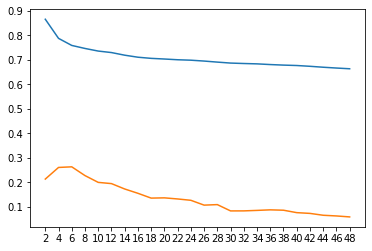

In [14]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);

In [15]:

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

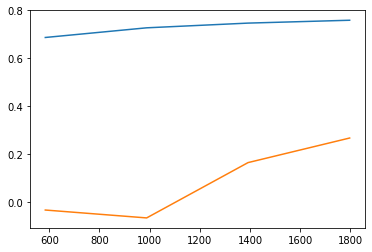

In [16]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])

---

<img src="./img/learning_curve.png" width=500>

El modelo aún está aprendiendo, sin embargo no tenemos como obtener datos adicionales.

** Como solucionar el overfitting y el underfitting?**

Viarianza Alta:

- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

Bias Alto:

- Más features
- Modelo más complejo

Mal resultado general:

- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidad por tu dataset